In [1]:
#import libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

import warnings
warnings.filterwarnings('ignore')

# What game has the most earnings?

In [2]:
#read datasets
country_df = pd.read_csv("../datasets/country-and-continent-codes-list.csv")
player_df = pd.read_csv("../datasets/highest_earning_players.csv")
org_df = pd.read_csv("../datasets/highest_earning_teams.csv")

In [3]:
# take a look into each dataframe
country_df.head()

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0


In [4]:
player_df.head()


,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter


In [5]:
org_df.head()


,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,760,San Francisco Shock,3105000.0,7,Overwatch,First-Person Shooter
1,776,London Spitfire,1591136.5,13,Overwatch,First-Person Shooter
2,768,New York Excelsior,1572618.5,18,Overwatch,First-Person Shooter
3,773,Philadelphia Fusion,1186278.5,15,Overwatch,First-Person Shooter
4,766,Seoul Dynasty,1130000.0,6,Overwatch,First-Person Shooter


### Cleaning Our Dataframes

In [6]:
#country dataframe 

#dropping columns that aren't needed and dropping duplicates, if any
country = country_df[['Continent_Name', 'Country_Name', 'Two_Letter_Country_Code']].drop_duplicates()
country = country.rename(columns = {
    "Two_Letter_Country_Code": 'CountryCode'
})
#see if there are any nans
country.isna().sum()
country = country.dropna()
country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 0 to 261
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Continent_Name  261 non-null    object
 1   Country_Name    261 non-null    object
 2   CountryCode     261 non-null    object
dtypes: object(3)
memory usage: 8.2+ KB


In [7]:
#player df
player_df.info()
player_df.isna().sum()

#check for duplicate values
player_df.duplicated().value_counts() #nice ! no duplicates found 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PlayerId       1000 non-null   int64  
 1   NameFirst      1000 non-null   object 
 2   NameLast       1000 non-null   object 
 3   CurrentHandle  1000 non-null   object 
 4   CountryCode    1000 non-null   object 
 5   TotalUSDPrize  1000 non-null   float64
 6   Game           1000 non-null   object 
 7   Genre          1000 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


False    1000
dtype: int64

In [8]:
#org df
org_df.info()
org_df.isna().sum()

#check for duplicates
org_df.duplicated().value_counts() #also no duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TeamId            928 non-null    int64  
 1   TeamName          928 non-null    object 
 2   TotalUSDPrize     928 non-null    float64
 3   TotalTournaments  928 non-null    int64  
 4   Game              928 non-null    object 
 5   Genre             928 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 43.6+ KB


False    928
dtype: int64

### Which game has the most earnings?

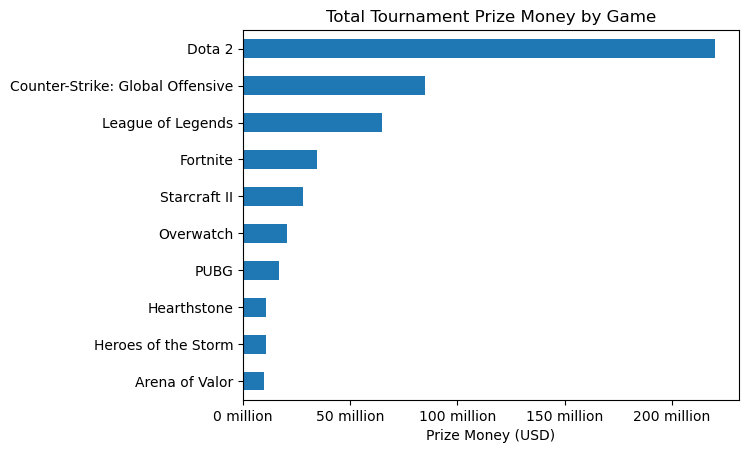

In [9]:
game_earnings = org_df.groupby('Game')['TotalUSDPrize'].sum().sort_values()
fig1 = game_earnings.plot(kind = 'barh', x = 'Game', y = 'TotalUSDPrize')
fig1.set_xticklabels(["0 million", "50 million", "100 million", "150 million", "200 million"])
fig1.set_xlabel('Prize Money (USD)')
fig1.set_ylabel("")
fig1.set_title('Total Tournament Prize Money by Game')
plt.show()

### Which players have the most earnings?

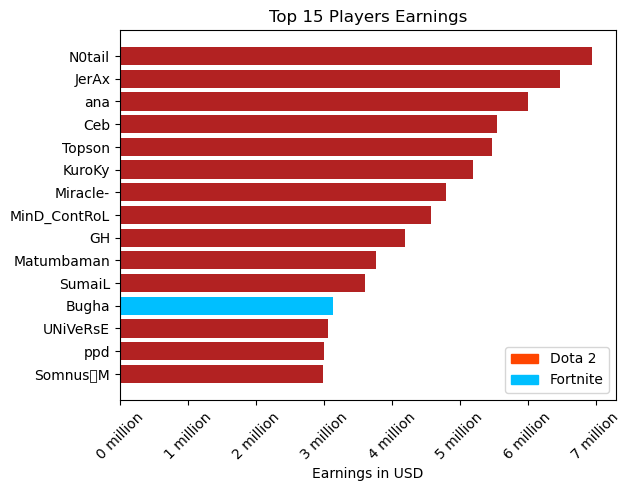

In [10]:
player_earnings = player_df.sort_values(by = 'TotalUSDPrize', ascending=False).head(15)
plt2_data = player_earnings[['CurrentHandle', 'TotalUSDPrize', 'Game']]
plt2_data = plt2_data.sort_values(by = 'TotalUSDPrize')
colors = {
    'Dota 2': 'firebrick',
    'Fortnite': 'deepskyblue'
}
plt.barh(plt2_data['CurrentHandle'], plt2_data['TotalUSDPrize'], color = [colors[game] for game in plt2_data['Game']])
plt.title('Top 15 Players Earnings')
plt.xlabel('Earnings in USD')
plt.xticks(ticks = np.arange(0,8000000, 1000000),
           labels = ['0 million', '1 million', '2 million', '3 million','4 million', '5 million', '6 million', '7 million'],
           rotation = 45)
#Creating custom legend
dota_label = mpatches.Patch(color = 'orangered', label = 'Dota 2')
fortnite_label = mpatches.Patch(color = 'deepskyblue', label = 'Fortnite')
plt.legend(handles = [dota_label, fortnite_label])

#### Seems like Dota 2 dominates all the other esports, so let's look into top 3 player earnings by game!

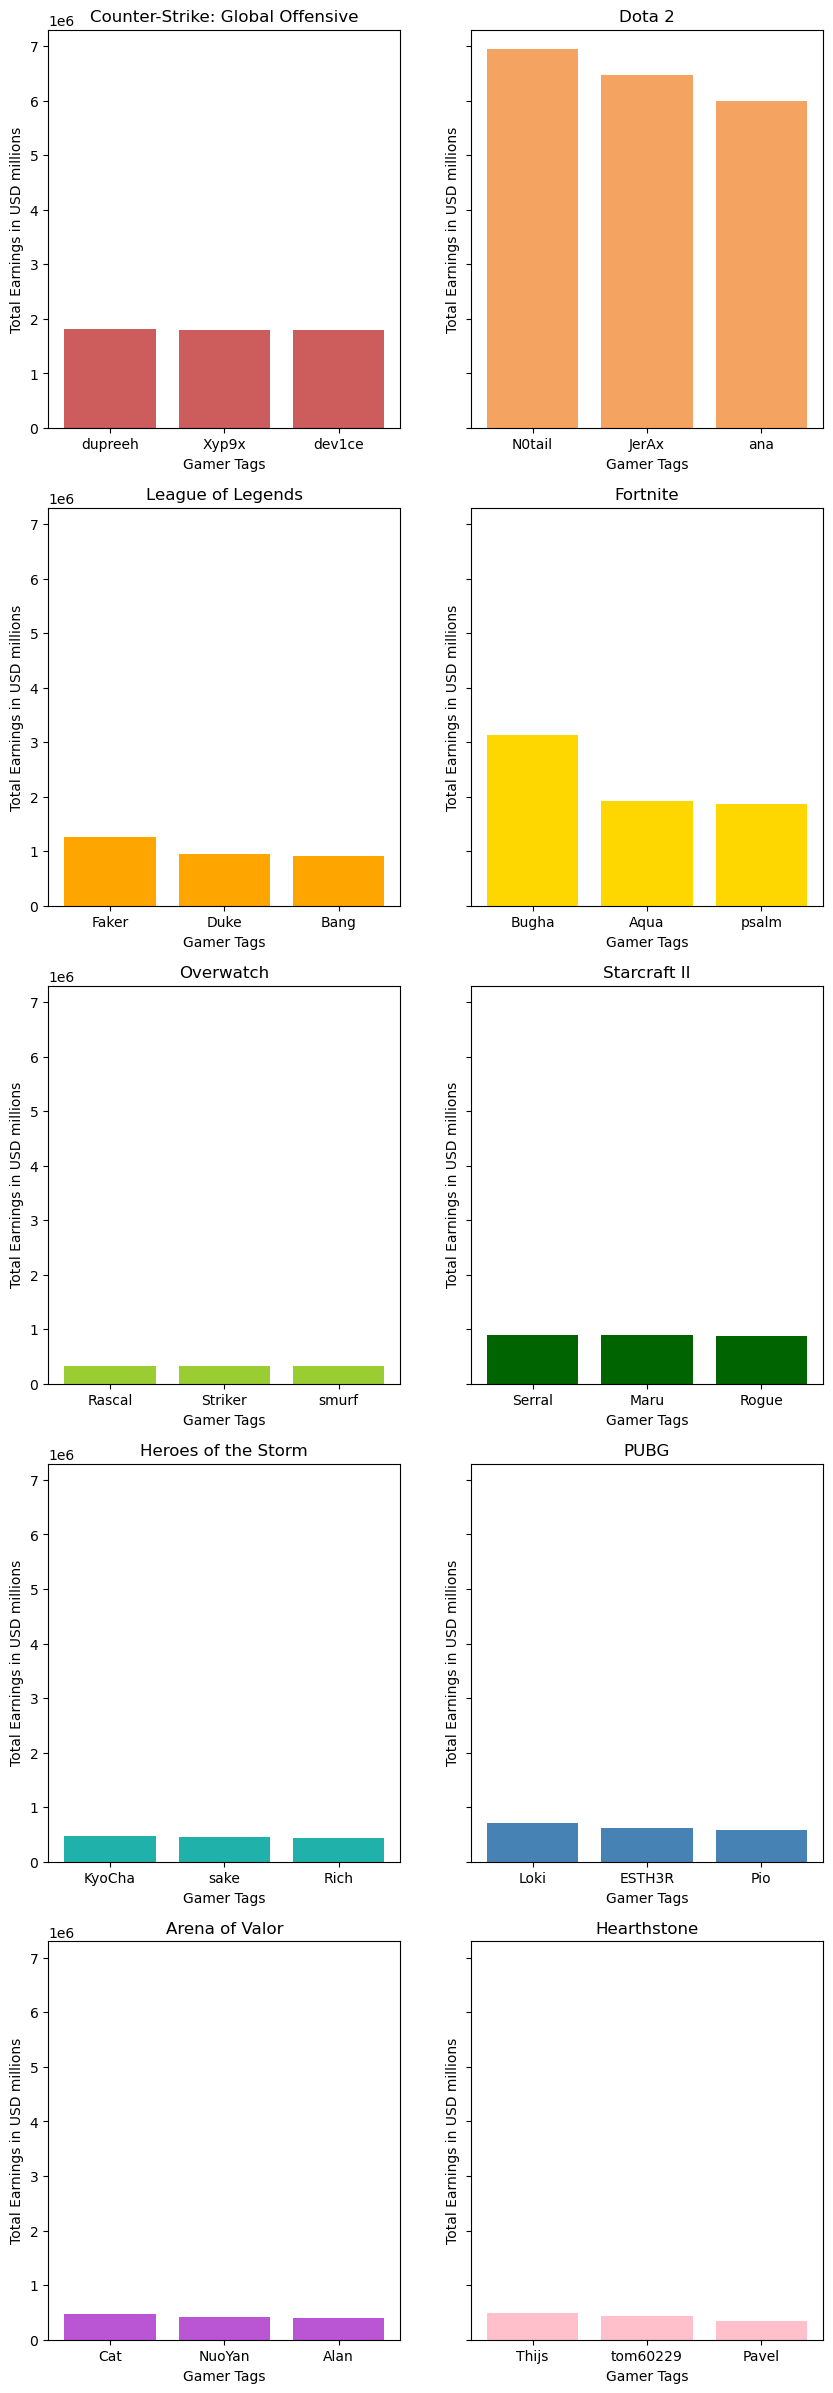

In [11]:
game_list = player_df['Game'].unique()

cs_players = player_df.loc[player_df['Game'] == game_list[0]].sort_values(by = 'TotalUSDPrize', ascending=False).head(3)

#create separate dataframes
games = []
         

for i in range(len(game_list)):
    games.append(pd.DataFrame(player_df.loc[player_df['Game'] == game_list[i]].sort_values(by = 'TotalUSDPrize', ascending=False).head(3)))


#plotting
game_colors = ['indianred', 'sandybrown', 'orange', 'gold', 'yellowgreen', 
               'darkgreen', 'lightseagreen', 'steelblue', 'mediumorchid', 'pink']

fig, axes = plt.subplots(5, 2, figsize = (10,30), sharey = True)
i=0
for row in range(5):
    for col in range(2):
        axes[row, col].bar(games[i]['CurrentHandle'], games[i]['TotalUSDPrize'], color = game_colors[i])
        axes[row, col].set_ylabel('Total Earnings in USD millions')
        axes[row, col].set_xlabel('Gamer Tags')
        axes[row, col].set_title(games[i]['Game'].min())

        i+=1

### Which countries have the most esports earnings?

In [12]:
#cleaning up data
player_df['CountryCode'] = player_df['CountryCode'].str.upper()
player_df.head()
country_earnings = player_df.merge(country, on = 'CountryCode', how = 'left')
country_data = pd.DataFrame(country_earnings.groupby('Country_Name')['TotalUSDPrize'].sum()).reset_index()
#plotting
country_earnings_data = dict(
    type = 'choropleth',
    colorscale = 'Jet',
    locations = country_data['Country_Name'],
    locationmode = "country names",
    z = country_data['TotalUSDPrize'],
    colorbar = {'title' : 'Total Earnings in USD'},
)
layout = dict(
    title = 'Earnings in USD',
    geo = dict(showframe = False, projection = {'type': 'mercator'}),
    autosize = True,
    width = 900
)
chmap = go.Figure(data = country_earnings_data, layout = layout)
chmap.update_layout(title_text = 'Earnings in USD by Country', title_x = 0.5, title_y = .1)
chmap.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
iplot(chmap)

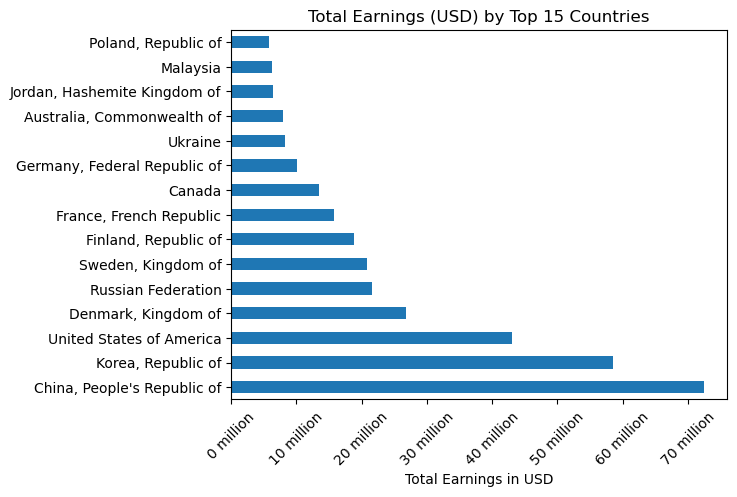

In [13]:
country_data_bar_data = country_data.sort_values(by = 'TotalUSDPrize', ascending = False).head(15)
plt3 = country_data_bar_data.plot(kind = 'barh', x='Country_Name', y = 'TotalUSDPrize')
plt3.set_xlabel('Total Earnings in USD')
plt3.set_ylabel('')
plt3.set_xticklabels(["0 million", "10 million", "20 million", "30 million", "40 million",
                      "50 million", "60 million", "70 million"], rotation = 45)
plt3.set_title('Total Earnings (USD) by Top 15 Countries')
plt3.get_legend().remove()
plt.show()


### Which organization has the most earnings?

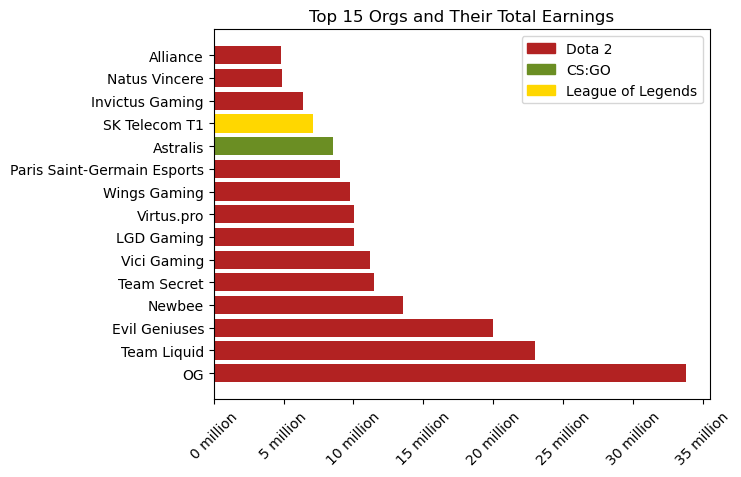

array(['Overwatch', 'Starcraft II', 'League of Legends', 'Fortnite',
       'Counter-Strike: Global Offensive', 'Dota 2', 'PUBG',
       'Heroes of the Storm', 'Hearthstone', 'Arena of Valor'],
      dtype=object)

In [14]:
org_earnings = org_df.sort_values(by = 'TotalUSDPrize', ascending=False).head(15).reset_index()

colors_orgs = {
    'Dota 2': 'firebrick',
    'Counter-Strike: Global Offensive': 'olivedrab',
    'League of Legends': 'gold'
}


plt.barh(org_earnings['TeamName'], org_earnings['TotalUSDPrize'], color = [colors_orgs[game] for game in org_earnings['Game']])
plt.title('Top 15 Orgs and Their Total Earnings')
plt.xticks(np.arange(0, 40000000, 5000000),
           ['0 million', '5 million', '10 million', '15 million', '20 million', '25 million', '30 million', '35 million'],
           rotation = 45)
#Creating custom legend
dota_org_label = mpatches.Patch(color = 'firebrick', label = 'Dota 2')
cs_org_label = mpatches.Patch(color = 'olivedrab', label = 'CS:GO')
lol_org_label = mpatches.Patch(color = 'gold', label = 'League of Legends')
plt.legend(handles = [dota_org_label, cs_org_label, lol_org_label])
plt.show()
org_df['Game'].unique()

#### Surprise! Dota 2 dominates once again. Let's look at the top 3 orgs for each game now.

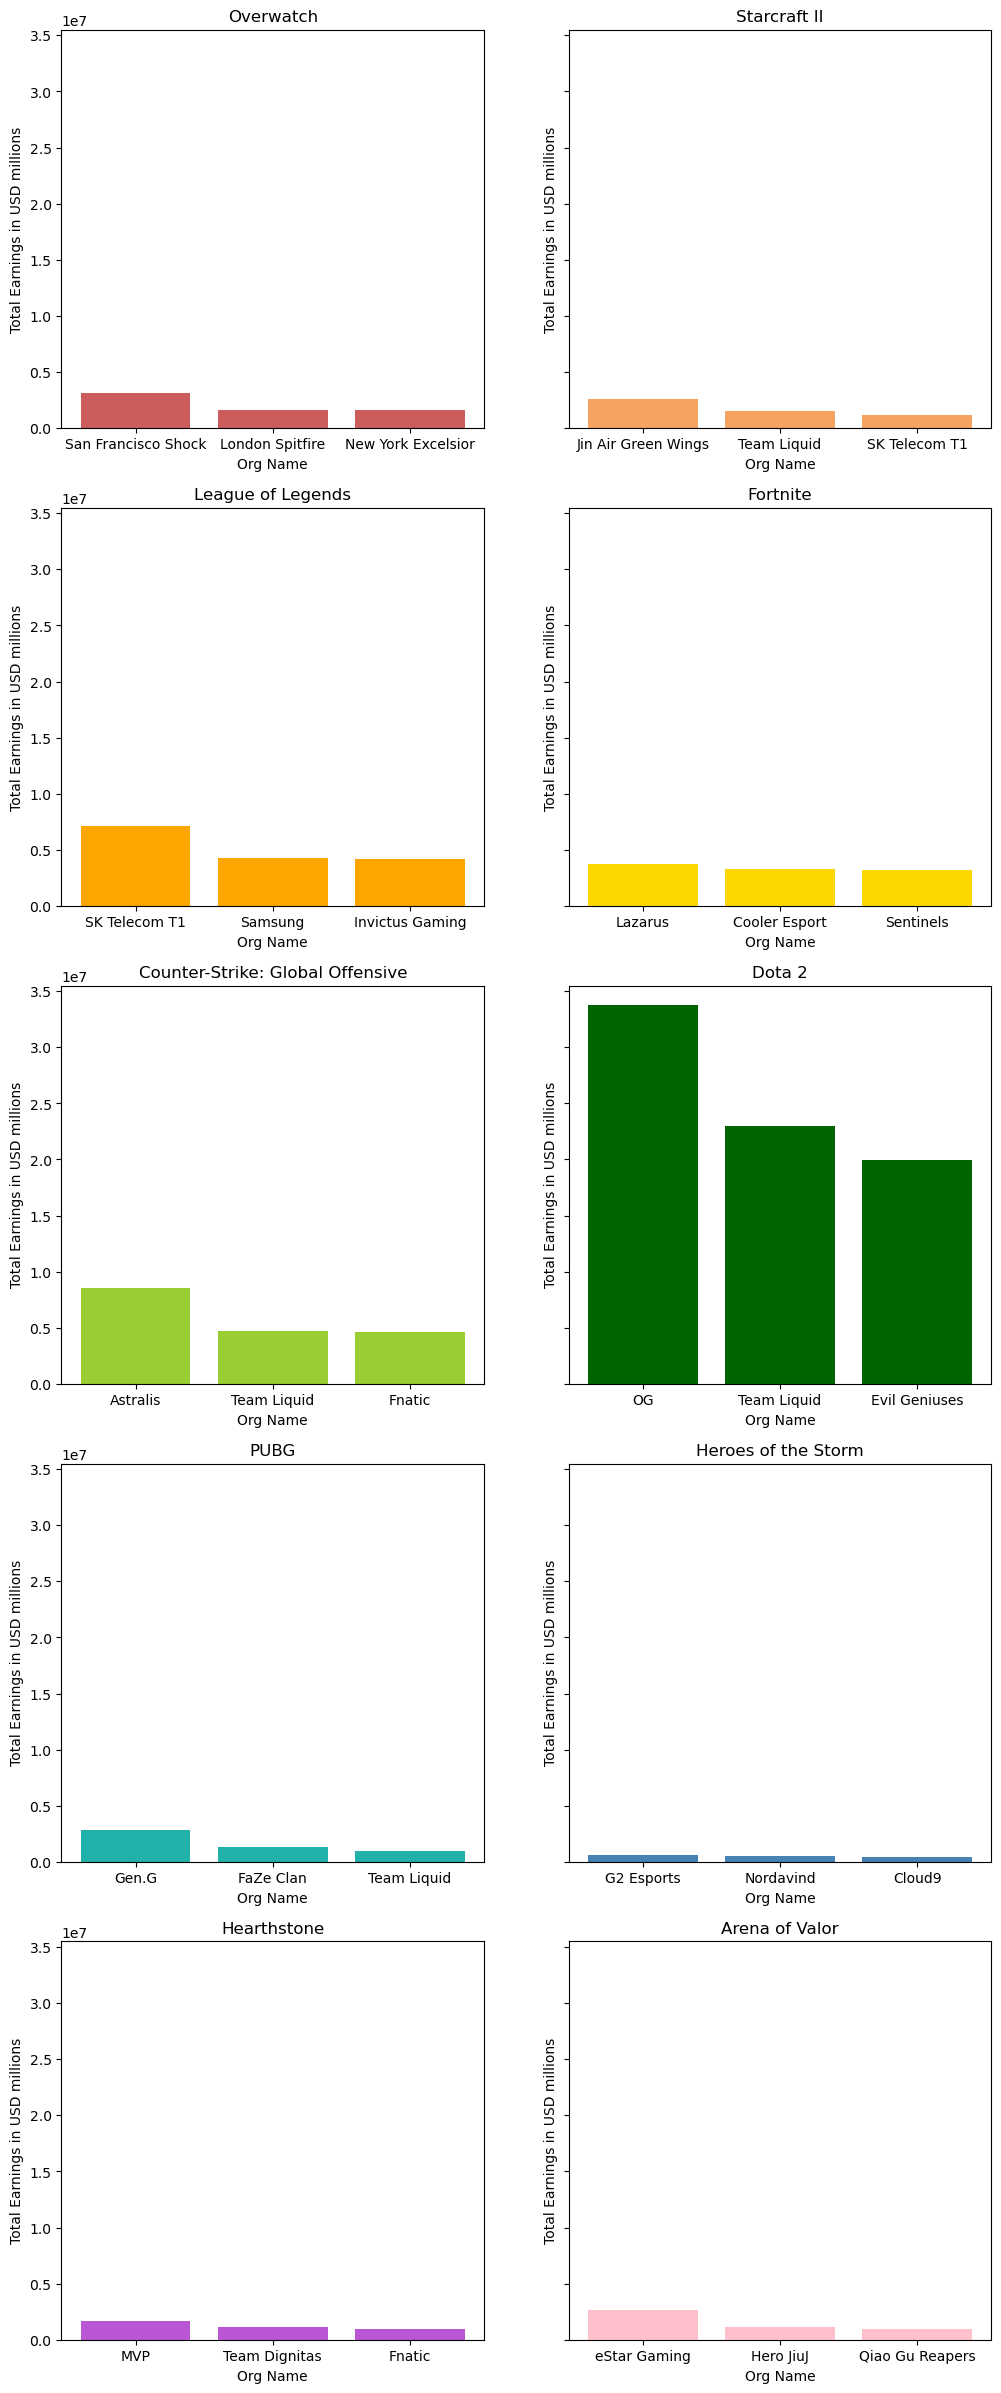

In [15]:
game_list_org = org_df['Game'].unique()

#create separate dataframes

games_org = []

for i in range(len(game_list_org)):
    games_org.append(org_df.loc[org_df['Game'] == game_list_org[i]].sort_values(by = 'TotalUSDPrize', ascending=False).head(3))


#plotting
game_colors_org = ['indianred', 'sandybrown', 'orange', 'gold', 'yellowgreen', 
               'darkgreen', 'lightseagreen', 'steelblue', 'mediumorchid', 'pink']

fig, axes = plt.subplots(5, 2, figsize = (12,30), sharey = True)
i=0
for row in range(5):
    for col in range(2):
        axes[row, col].bar(games_org[i]['TeamName'], games_org[i]['TotalUSDPrize'], color = game_colors_org[i])
        axes[row, col].set_ylabel('Total Earnings in USD millions')
        axes[row, col].set_xlabel('Org Name')
        axes[row, col].set_title(games_org[i]['Game'].min())

        i+=1


### Is there a relationship between number of tournaments and tournament earnings?

The r value is 0.20


Text(0.5, 0, 'Total Tournaments Entered')

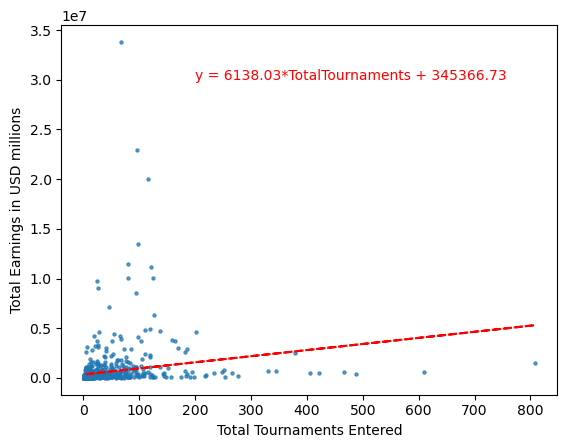

In [37]:
x = org_df['TotalTournaments']
y = org_df['TotalUSDPrize']
plt.scatter(x, y, s = 5, alpha = 0.7)
slope, int, r, p, st_err = stats.linregress(x, y)
fit = slope * x + int
str_fit = f'y = {slope:.2f}*TotalTournaments + {int:.2f}'
plt.plot(x, fit, '--', color = 'red')
plt.text(200,30000000,str_fit, color = 'red')
print(f'The r value is {r:.2f}')
plt.ylabel('Total Earnings in USD millions')
plt.xlabel('Total Tournaments Entered')

### Not really, with a coefficient of determination of 0.04, just because your org is more active, doesn't mean you'll make more money.

#### Seems like there is an uneven distribution of tournaments entered, so let's see if there is a relationship when we eliminate outliers

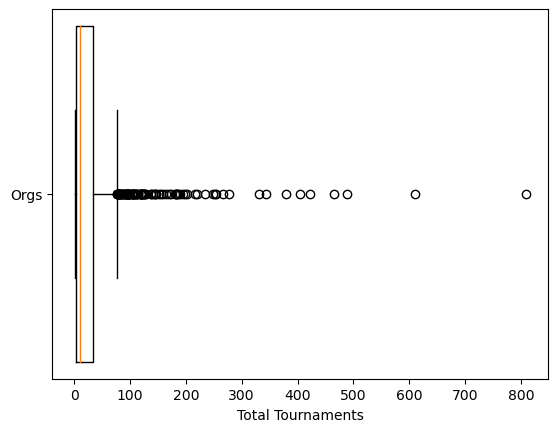

In [62]:
plt.boxplot(org_df['TotalTournaments'], vert = False, widths= 70)
plt.xlabel('Total Tournaments')
plt.yticks([1], ['Orgs'])
plt.show()


In [28]:
q1 = org_df['TotalTournaments'].quantile(0.25)
q3 = org_df['TotalTournaments'].quantile(0.75)
iqr = q3 -q1
drop_outliers = org_df.loc[(org_df['TotalTournaments'] > q1 - (iqr*1.5)) & (org_df['TotalTournaments'] < q3 + (iqr*1.5))]

76

The r value is 0.26


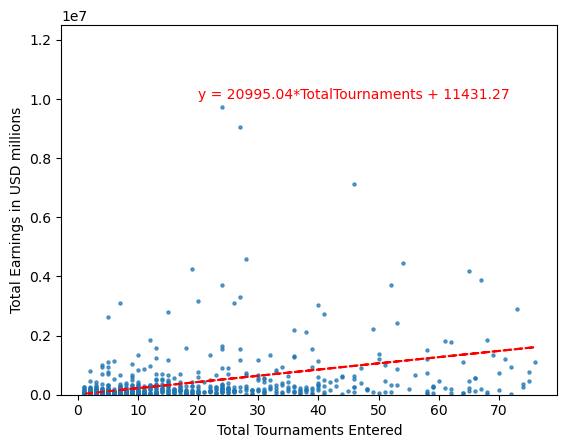

In [36]:
x2 = drop_outliers['TotalTournaments']
y2 = drop_outliers['TotalUSDPrize']
plt.scatter(x2, y2, s = 5, alpha = 0.7)
slope2, int2, r2, p2, st_err2 = stats.linregress(x2, y2)
fit2 = slope2 * x2 + int2
str_fit2 = f'y = {slope2:.2f}*TotalTournaments + {int2:.2f}'
plt.plot(x2, fit2, '--', color = 'red')
plt.text(20,10000000,str_fit2, color = 'red')
print(f'The r value is {r2:.2f}')
plt.ylim(0, 12500000)
plt.ylabel('Total Earnings in USD millions')
plt.xlabel('Total Tournaments Entered')
plt.show()